# "Best" Worst Neighborhood Metric 3: 
# Number of COVID-19 Cases per 100 Individuals Tested for each Neighborhood

In [2]:
# Import pandas. And maybe koalas too. Actually no. Just pandas 
import pandas as pd

In [3]:
# Loading the full Covid dataframe
full_covid_data = pd.read_csv("https://data.wprdc.org/datastore/dump/0f214885-ff3e-44e1-9963-e9e9062a04d1")
# Listing the first 5 elements
full_covid_data.head()

,neighborhood_municipality,indv_tested,cases,deaths,update_date
0,Aleppo,367,8,0,2020-11-02
1,Allegheny Center (Pittsburgh),209,18,0,2020-11-02
2,Allegheny West (Pittsburgh),102,3,0,2020-11-02
3,Allentown (Pittsburgh),346,32,0,2020-11-02
4,Arlington (Pittsburgh),277,27,1,2020-11-02


## Dataset: Covid-19 Counts by Municipality and Pittsburgh Neighborhood 
#### (Last Updated Date: 11/2/2020)
This dataset provides 5 columns: Neighborhood/Municipality, Individuals Tested, Cases, Deaths, and Update Date

With regards to the purpose of this project, we will mainly focus on 3 of the above categories: **Neighborhood/Municipality**, **Individuals Tested**, and **Cases**.

The desired metric from the data will be calculated by the following formula for each Pittsburgh neighborhood:

### (Reported Cases / Individuals Tested) x 100

### **Metric**: Number of COVID-19 Positive Cases per 100 Individuals Tested


This metric will be sorted in descending order from the top (highest) to bottom (lowest): neighborhoods with the highest number of COVID-19 positive cases per 100 individuals tested will be assigned a score of 1 (highest) down to 20 for the first 20 neighborhoods. 

Thus, the neighborhood assigned a score of "1" will be the "best" at being the worst in mitigating the spread of Covid-19.

Note: This ranking system can be likened to a golf score; lower scores are desirable rather than higher scores.

In [4]:
# Creating another dataframe choosing only the 3 desired columns mentioned above
covid_data = pd.read_csv("https://data.wprdc.org/datastore/dump/0f214885-ff3e-44e1-9963-e9e9062a04d1", 
                          usecols = ['neighborhood_municipality', 'indv_tested', 'cases'])
# Listing the first 5 data points
covid_data.head()

,neighborhood_municipality,indv_tested,cases
0,Aleppo,367,8
1,Allegheny Center (Pittsburgh),209,18
2,Allegheny West (Pittsburgh),102,3
3,Allentown (Pittsburgh),346,32
4,Arlington (Pittsburgh),277,27


In [5]:
# Total number of data points in the dataset (duplicate check)
covid_data.count()

neighborhood_municipality    221
indv_tested                  221
cases                        221
dtype: int64

In [6]:
# Determine how many unique neighborhoods are in the dataset in case there are any duplicates
len(covid_data["neighborhood_municipality"].unique())

221

In [7]:
# Addition of a "cases_per_100_indv" column to find the average 
# amount of cases per 100 individuals in each neighborhood

# This category is essentially just the percentage of cases per individuals tested
covid_data['cases_per_100_indv'] = covid_data['cases'] / covid_data['indv_tested'] * 100
covid_data.head()

,neighborhood_municipality,indv_tested,cases,cases_per_100_indv
0,Aleppo,367,8,2.179837
1,Allegheny Center (Pittsburgh),209,18,8.612440
2,Allegheny West (Pittsburgh),102,3,2.941176
3,Allentown (Pittsburgh),346,32,9.248555
4,Arlington (Pittsburgh),277,27,9.747292


In [8]:
# Pivot the table to place the neighborhood_municipality values as 
# columns and values as the cases_per_100_indv

# Quickly realized that this just made it more confusing (odds that two neighborhoods 
# have the same cases_per_100_indv value is extremely small)
covid_data.pivot(columns="neighborhood_municipality", values="cases_per_100_indv").head()

neighborhood_municipality,Aleppo,Allegheny Center (Pittsburgh),Allegheny West (Pittsburgh),Allentown (Pittsburgh),Arlington (Pittsburgh),Arlington Heights (Pittsburgh),Aspinwall,Avalon,Baldwin Borough,Baldwin Township,...,West Oakland (Pittsburgh),West View,Westwood (Pittsburgh),Whitaker,White Oak,Whitehall,Wilkins,Wilkinsburg,Wilmerding,Windgap (Pittsburgh)
0,2.179837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,8.61244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2.941176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,9.248555,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,9.747292,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Sorting the data in descending order to see which 20 neighborhoods 
# are most at risk (approximately 10% of the 221 total neighborhoods)
covid_data.sort_values("cases_per_100_indv", ascending = False).head(20)

,neighborhood_municipality,indv_tested,cases,cases_per_100_indv
82,Glen Hazel (Pittsburgh),317,95,29.968454
38,Central Oakland (Pittsburgh),1379,244,17.693981
8,Baldwin Borough,4118,646,15.687227
216,Whitehall,2533,396,15.633636
173,South Oakland (Pittsburgh),580,90,15.517241
91,Haysville,13,2,15.384615
131,New Homestead (Pittsburgh),155,23,14.838710
126,Mount Oliver Borough,494,68,13.765182
39,Chalfant,147,20,13.605442
90,Hays (Pittsburgh),45,6,13.333333


In [10]:
# Creates a new dataframe called high_to_low_risk that sorts the covid_data 
# from descending order beginning with the most cases per 100 individuals per neighborhood 

# Exactly the same as the last step except now high_risk can be used as a unique dataframe
# The size of high_risk is the same as covid_data
high_to_low_risk = covid_data.sort_values("cases_per_100_indv", ascending = False)

# List the first 20 neighborhoods that have the most cases per 100 individuals (Same thing as last step)
high_to_low_risk.head(20)

,neighborhood_municipality,indv_tested,cases,cases_per_100_indv
82,Glen Hazel (Pittsburgh),317,95,29.968454
38,Central Oakland (Pittsburgh),1379,244,17.693981
8,Baldwin Borough,4118,646,15.687227
216,Whitehall,2533,396,15.633636
173,South Oakland (Pittsburgh),580,90,15.517241
91,Haysville,13,2,15.384615
131,New Homestead (Pittsburgh),155,23,14.838710
126,Mount Oliver Borough,494,68,13.765182
39,Chalfant,147,20,13.605442
90,Hays (Pittsburgh),45,6,13.333333


In [11]:
# Creates a new dataframe called highest_risk that
# contains only the first 20 data points from high_risk

# Various forms for the first 20 elements serves to show how data 
# can be represented in multiple ways to aid in future actions (graph)

highest_risk = high_to_low_risk.head(20)
highest_risk.head(20)

,neighborhood_municipality,indv_tested,cases,cases_per_100_indv
82,Glen Hazel (Pittsburgh),317,95,29.968454
38,Central Oakland (Pittsburgh),1379,244,17.693981
8,Baldwin Borough,4118,646,15.687227
216,Whitehall,2533,396,15.633636
173,South Oakland (Pittsburgh),580,90,15.517241
91,Haysville,13,2,15.384615
131,New Homestead (Pittsburgh),155,23,14.838710
126,Mount Oliver Borough,494,68,13.765182
39,Chalfant,147,20,13.605442
90,Hays (Pittsburgh),45,6,13.333333


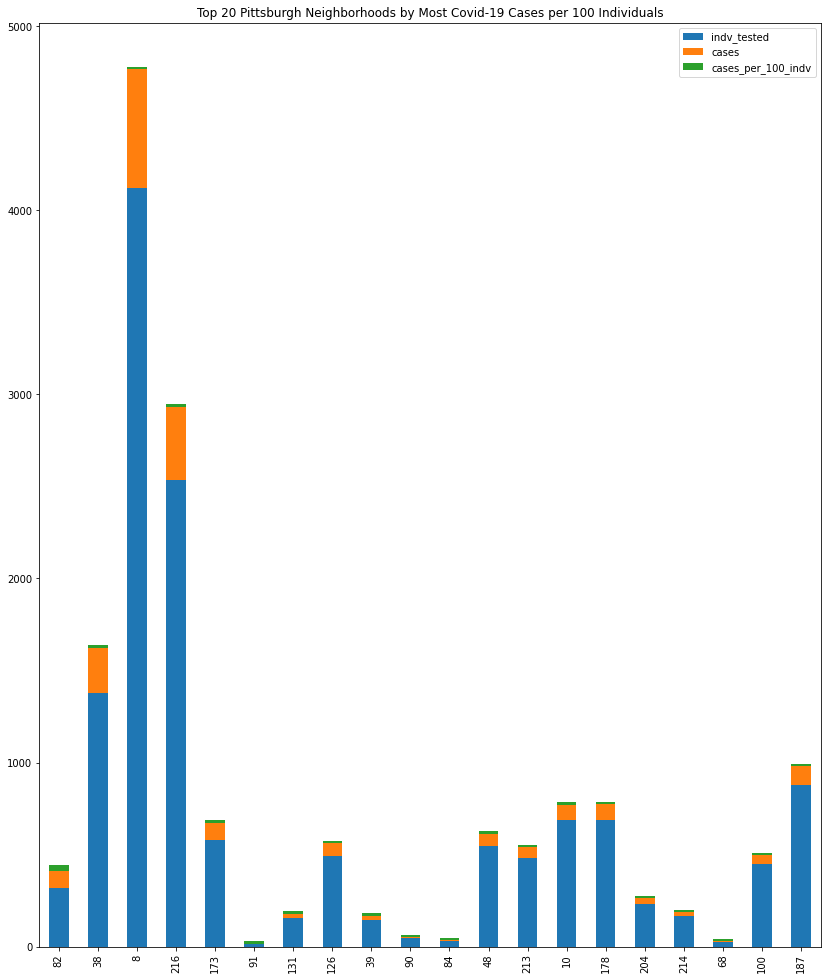

In [12]:
# Bar Chart of the highest_risk dataframe that contains only the 
# top 20 Pittsburgh neighborhoods with the highest metric 
highest_risk.plot.bar(title = "Top 20 Pittsburgh Neighborhoods by Most Covid-19 Cases per 100 Individuals", 
                    figsize=(14,17), stacked = True)

### Conclusion

The data collected was from the "Allegheny County COVID-19 Counts by Municipality and Pittsburgh Neighborhood". We selected this dataset since the overall goal is to determine which neighborhood is "best" at being the worst, and a neighborhood that currently handles Covid-19 poorly would reflect that purpose, especially during this crisis of public health and safety. The metric for this dataset is determined by dividing the number of cases by the indidividuals tested and multiplying that result by 100 to attain the following:

(Reported Cases / Individuals Tested) x 100  ------> Number of Covid-19 Cases per 100 Individuals Tested

Ultimately, Glen Hazel (Pittsburgh) is the "best" worst neighborhood since it has approximately 30 cases per 100 tests, followed by Central Oakland (Pittsburgh) and Baldwin Borough at approximately 18 and 16 cases per 100 individuals tested, respectively. It is important to note that this conclusion is based solely from the given data and is not representatative of all individuals from these neighborhoods. Viewing the data closely in the bar chart, it is clear that the individuals tested in some neighborhoods are significantly less than that of others (compare Haysville and Baldwin Borough). Thus, there may be inconsistencies with the given conclusion due to this observation. However, in terms of the first 5 neighborhoods presented in the bar chart starting from the left, 3 have over 1000 individuals tested with the other 2 at approximately 700 and 400 individuals tested, an indication of  reliable results. 

In conclusion, according to data presented in the "Allegheny County COVID-19 Counts by Municipality and Pittsburgh Neighborhood" dataset updated at 11/2/2020, Glen Hazel (Pittsburgh) is the "best" neighborhood at being the worst to live in due to approximately 30 individuals being tested positive for Covid-19 for every 100 individuals tested.

In [15]:
result_covid = highest_risk.to_csv("result_covid.csv")